
# Two ways to sort in problem 2

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Fancy Pandas way
Thanks to Alex for the inspiration!

In [3]:
buildings = pd.read_csv("/Users/jillnaiman1/Downloads/building_inventory.csv",
               na_values = {'Year Acquired': 0, 
                            'Year Constructed': 0, 
                            'Square Footage': 0})


# grab all counts
counts = buildings.groupby('Agency Name')['Agency Name'].transform('count')
# min counts
totDept = 5
minCounts = np.sort(np.unique(counts))[::-1][totDept-1]
# assign counts to new DF
newBuildings = buildings.assign(counts=counts)
# just take subset of info we want
newBuildings = newBuildings.loc[:,['Agency Name','Square Footage','Year Acquired','counts']]
# sort based on counts    
newBuildings = newBuildings.sort_values(by=['counts'],ascending=[False])

# or, as 1 line:
newBuildings = buildings.assign(counts=buildings.groupby('Agency Name')['Agency Name'].transform('count')).sort_values(by=['counts'],ascending=[False]).loc[:,['Agency Name','Square Footage','Year Acquired','counts']]

mask = newBuildings['counts'] >= minCounts

newBuildings = newBuildings[mask]
newBuildings


,Agency Name,Square Footage,Year Acquired,counts
0,Department of Natural Resources,144.0,1975.0,3223
2479,Department of Natural Resources,2400.0,1976.0,3223
2468,Department of Natural Resources,60.0,1985.0,3223
2469,Department of Natural Resources,104.0,2006.0,3223
2470,Department of Natural Resources,104.0,2006.0,3223
2471,Department of Natural Resources,104.0,2006.0,3223
2472,Department of Natural Resources,9908.0,1972.0,3223
2473,Department of Natural Resources,4000.0,1949.0,3223
2474,Department of Natural Resources,11325.0,1939.0,3223
2475,Department of Natural Resources,2430.0,1939.0,3223


## The inelegant numpy way I was doing it:

In [4]:
buildings = pd.read_csv("/Users/jillnaiman1/Downloads/building_inventory.csv",
               na_values = {'Year Acquired': 0, 
                            'Year Constructed': 0, 
                            'Square Footage': 0})

names = buildings['Agency Name'].values
years = buildings['Year Acquired'].values
sqFt = buildings['Square Footage'].values

counts = np.array([])
for n in np.unique(names): counts = np.append(counts,np.count_nonzero(names == n))
    
topDep = 5
mask = np.array([],dtype='int')
for i in range(topDep): 
    names_top = np.unique(names)[ np.argsort(counts) ][::-1][i]
    mask = np.append(mask, np.where(names_top == names))
    
data = np.array([names[mask],years[mask],sqFt[mask]]).T # right shape
newBuildings = pd.DataFrame(data=data, 
                            columns=['Agency Name','Year Acquired','Square Footage'])

newBuildings

,Agency Name,Year Acquired,Square Footage
0,Department of Natural Resources,1975,144
1,Department of Natural Resources,2004,144
2,Department of Natural Resources,2004,144
3,Department of Natural Resources,2004,144
4,Department of Natural Resources,2004,144
5,Department of Natural Resources,2004,144
6,Department of Natural Resources,2000,120
7,Department of Natural Resources,2000,120
8,Department of Natural Resources,2000,144
9,Department of Natural Resources,2000,144


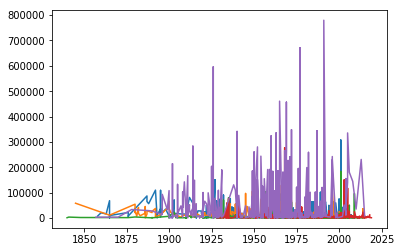

In [5]:
# use numpy to plot
for a in np.unique(newBuildings['Agency Name']):
    b = newBuildings[newBuildings['Agency Name'] == a]
    ind = np.argsort(b['Year Acquired'].values)
    plt.plot((b['Year Acquired'].values)[ind],(b['Square Footage'].values)[ind])
    

In [12]:
# to do rolling averages using pandas

# first, we want to apply the re-indexing by year that we did in class
set_ind = False
for k in newBuildings.keys():
    if k.find('Year Acquired') != -1:
        set_ind = True
        print(k,set_ind)
if set_ind: newBuildings.set_index('Year Acquired',inplace=True)

newBuildings


,Agency Name,Square Footage
Year Acquired,,
1975.0,Department of Natural Resources,144
2004.0,Department of Natural Resources,144
2004.0,Department of Natural Resources,144
2004.0,Department of Natural Resources,144
2004.0,Department of Natural Resources,144
2004.0,Department of Natural Resources,144
2000.0,Department of Natural Resources,120
2000.0,Department of Natural Resources,120
2000.0,Department of Natural Resources,144


In [17]:
import ipywidgets

@ipywidgets.interact(window = (1, 100, 1))
def make_plot(window):
    fig, ax = plt.subplots(5,1,figsize=(5,5*5))
    for i,a in enumerate(np.unique(newBuildings['Agency Name'])):
        b = (newBuildings[newBuildings['Agency Name'] == a]).sort_index()
        sqrFoot = b['Square Footage'].rolling(window=window,center=True).mean()
        b['Square Footage'].plot(ax=ax[i])
        sqrFoot.plot(ax=ax[i])
        ax[i].set_title(a)

interactive(children=(IntSlider(value=50, description='window', min=1), Output()), _dom_classes=('widget-inter…